In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
df=yf.download('AAPL',start='2010-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.405577,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
...,...,...,...,...,...,...
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000
2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000


In [3]:
date='2023-01-01'

In [4]:
series=df.loc[date:][1:2]

In [5]:
series

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-04,126.889999,128.660004,125.080002,126.360001,126.167366,89113600


In [6]:
series=df.loc[date:][1:2].squeeze()

In [7]:
series

Open         1.268900e+02
High         1.286600e+02
Low          1.250800e+02
Close        1.263600e+02
Adj Close    1.261674e+02
Volume       8.911360e+07
Name: 2023-01-04 00:00:00, dtype: float64

In [8]:
diff_=series.High-series.Low

In [9]:
diff_

3.5800018310546875

In [10]:
ratios_=[-0.618,0.618,1.618]

In [11]:
[i*diff_ for i in ratios_]

[-2.2124411315917967, 2.2124411315917967, 5.792442962646485]

In [12]:
levels_=[i*diff_+series.Close for i in ratios_]

In [13]:
levels_

[124.14755947875976, 128.57244174194335, 132.15244357299804]

In [14]:
df.loc[date:][:7].Close

Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
2023-01-10    130.729996
2023-01-11    133.490005
Name: Close, dtype: float64

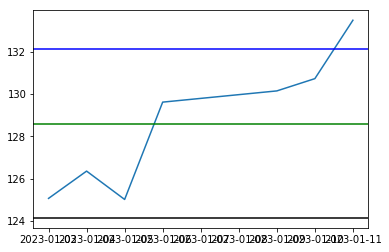

In [15]:
plt.plot(df.loc[date:][:7].Close)
plt.axhline(y=levels_[0],color='K',linestyle='-')
plt.axhline(y=levels_[1],color='g',linestyle='-')
plt.axhline(y=levels_[2],color='b',linestyle='-')

In [16]:
date='2023-02-1'

In [17]:
def get_levels(date):
    values=[-0.618,0.618,1.618]
    series_=df.loc[date:][1:2].squeeze()
    diff=series_.High-series.Low
    levels=[series_.Close+i*diff for i in values]
    return levels

In [18]:
get_levels(date)

[134.69021298217774, 166.94980166625976, 193.04979251098632]

In [19]:
sl,entry,tp=get_levels(date)

In [20]:
sl,entry,tp

(134.69021298217774, 166.94980166625976, 193.04979251098632)

In [21]:
one_week=df.loc[date:][:7]

In [22]:
one_week['Price']=one_week.Open.shift(-1)

In [23]:
one_week

,Open,High,Low,Close,Adj Close,Volume,Price
Date,,,,,,,
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.208282,77663600,148.899994
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.590088,118339000,148.029999
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.264465,154279900,152.570007
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.498688,69858300,150.639999
2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,153.880005
2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,153.779999
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,NaN


In [24]:
in_position=False
for index,row in one_week.iterrows():
    if not in_position and row.Close>=entry:
        print(row.Close)
        print(index)
        in_position=True
    elif in_position:
        if row.Close>=tp or row.Close <=sl:
            print(row.Close)
            in_position=False
            break
    

In [25]:
133.49000549316406-129.6199951171875

3.8700103759765625

(array([738552., 738553., 738554., 738555., 738556., 738557., 738558.,
        738559., 738560.]),
 <a list of 9 Text xticklabel objects>)

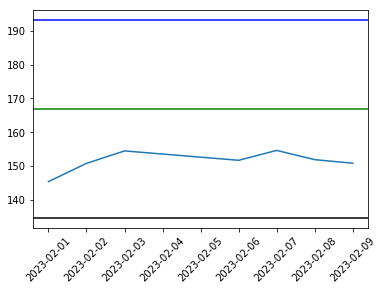

In [26]:
plt.plot(df.loc[date:][:7].Close)
plt.axhline(y=sl,color='K',linestyle='-')
plt.axhline(y=entry,color='g',linestyle='-')
plt.axhline(y=tp,color='b',linestyle='-')
plt.xticks(rotation=45)